In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.0 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 45.8 MB/s 
     |████████████████████████████████| 6.8 MB 26.4 MB/s 
     |████████████████████████████████| 2.0 MB 43.6 MB/s 
     |████████████████████████████████| 261 kB 33.5 MB/s 
     |████████████████████████████████| 113 kB 59.4 MB/s 
     |████████████████████████████████| 15.5 MB 64.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.8 MB/s 
     |████████████████████████████████| 1.7 MB 61.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 675 kB 56.5 MB/s 
     |████████████████████████████████| 102 kB 12.0 MB/s 
     |████████████████████████████████| 303 kB 41.5 MB/s 
     |█████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip -q bank.zip

In [4]:
import numpy as np
import pandas as pd

#load csv file
df = pd.read_csv('bank.csv', sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.shape

(4521, 17)

In [6]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4069, 17)
Unseen Data For Predictions: (452, 17)


In [ ]:
y

In [7]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'y', session_id=123) 



,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(4069, 17)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9010,0.8836,0.2806,0.6020,0.3794,0.3347,0.3646,0.829
ridge,Ridge Classifier,0.8978,0.0000,0.2210,0.6057,0.3216,0.2797,0.3225,0.020
lda,Linear Discriminant Analysis,0.8968,0.8870,0.3914,0.5516,0.4534,0.3988,0.4083,0.043
gbc,Gradient Boosting Classifier,0.8957,0.8995,0.3253,0.5520,0.4061,0.3536,0.3700,0.482
ada,Ada Boost Classifier,0.8947,0.8903,0.3348,0.5415,0.4103,0.3567,0.3706,0.198
lightgbm,Light Gradient Boosting Machine,0.8926,0.8954,0.3166,0.5265,0.3943,0.3396,0.3533,0.141
et,Extra Trees Classifier,0.8904,0.8726,0.1834,0.5239,0.2687,0.2244,0.2620,0.615
rf,Random Forest Classifier,0.8890,0.8926,0.1455,0.5082,0.2218,0.1822,0.2254,0.670
dummy,Dummy Classifier,0.8890,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.017
knn,K Neighbors Classifier,0.8796,0.7238,0.1770,0.4081,0.2443,0.1902,0.2110,0.136


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8912,0.9229,0.1613,0.5000,0.2439,0.2015,0.2396
1,0.9053,0.8730,0.2903,0.6429,0.4000,0.3564,0.3899
2,0.8912,0.8549,0.2500,0.5333,0.3404,0.2895,0.3143
3,0.8947,0.8654,0.2812,0.5625,0.3750,0.3244,0.3478
4,0.8982,0.8709,0.2812,0.6000,0.3830,0.3353,0.3641
5,0.9263,0.9186,0.4375,0.8235,0.5714,0.5352,0.5674
6,0.9088,0.9148,0.4062,0.6500,0.5000,0.4527,0.4679
7,0.9053,0.8790,0.3438,0.6471,0.4490,0.4024,0.4266
8,0.9085,0.8798,0.2581,0.7273,0.3810,0.3434,0.3979
9,0.8803,0.8573,0.0968,0.3333,0.1500,0.1061,0.1301


In [10]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8982,0.0,0.2258,0.5833,0.3256,0.2820,0.3196
1,0.8982,0.0,0.2258,0.5833,0.3256,0.2820,0.3196
2,0.8912,0.0,0.1562,0.5556,0.2439,0.2047,0.2535
3,0.8842,0.0,0.2500,0.4706,0.3265,0.2696,0.2858
4,0.8947,0.0,0.2188,0.5833,0.3182,0.2737,0.3128
5,0.9193,0.0,0.3125,0.9091,0.4651,0.4325,0.5057
6,0.9088,0.0,0.3125,0.7143,0.4348,0.3933,0.4334
7,0.9053,0.0,0.2500,0.7273,0.3721,0.3338,0.3903
8,0.8944,0.0,0.1613,0.5556,0.2500,0.2113,0.2590
9,0.8838,0.0,0.0968,0.3750,0.1538,0.1142,0.1451


In [12]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9018,0.9260,0.3548,0.5789,0.4400,0.3895,0.4036
1,0.9053,0.8707,0.3548,0.6111,0.4490,0.4011,0.4189
2,0.9018,0.8692,0.4062,0.5909,0.4815,0.4293,0.4385
3,0.8807,0.8671,0.4062,0.4643,0.4333,0.3670,0.3680
4,0.8947,0.8895,0.3750,0.5455,0.4444,0.3885,0.3968
5,0.9263,0.9192,0.5312,0.7391,0.6182,0.5786,0.5883
6,0.8877,0.9285,0.5625,0.5000,0.5294,0.4659,0.4670
7,0.8982,0.8764,0.3750,0.5714,0.4528,0.3994,0.4102
8,0.8944,0.8677,0.3226,0.5263,0.4000,0.3457,0.3582
9,0.8768,0.8558,0.2258,0.3889,0.2857,0.2234,0.2334


In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,0.9230,0.1935,0.5455,0.2857,0.2426,0.2810
1,0.9018,0.8553,0.2903,0.6000,0.3913,0.3448,0.3719
2,0.8912,0.8441,0.2500,0.5333,0.3404,0.2895,0.3143
3,0.8912,0.8662,0.2812,0.5294,0.3673,0.3139,0.3328
4,0.8947,0.8751,0.2812,0.5625,0.3750,0.3244,0.3478
5,0.9263,0.9164,0.4375,0.8235,0.5714,0.5352,0.5674
6,0.9053,0.9128,0.4062,0.6190,0.4906,0.4408,0.4527
7,0.9088,0.8801,0.3438,0.6875,0.4583,0.4145,0.4444
8,0.9049,0.8842,0.2581,0.6667,0.3721,0.3314,0.3755
9,0.8838,0.8529,0.1290,0.4000,0.1951,0.1499,0.1782


In [14]:
print(tuned_lr)

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
import numpy as np
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,0.9230,0.1935,0.5455,0.2857,0.2426,0.2810
1,0.9018,0.8553,0.2903,0.6000,0.3913,0.3448,0.3719
2,0.8912,0.8441,0.2500,0.5333,0.3404,0.2895,0.3143
3,0.8912,0.8662,0.2812,0.5294,0.3673,0.3139,0.3328
4,0.8947,0.8751,0.2812,0.5625,0.3750,0.3244,0.3478
5,0.9263,0.9164,0.4375,0.8235,0.5714,0.5352,0.5674
6,0.9053,0.9128,0.4062,0.6190,0.4906,0.4408,0.4527
7,0.9088,0.8801,0.3438,0.6875,0.4583,0.4145,0.4444
8,0.9049,0.8842,0.2581,0.6667,0.3721,0.3314,0.3755
9,0.8838,0.8529,0.1290,0.4000,0.1951,0.1499,0.1782


In [18]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8982,0.0,0.2258,0.5833,0.3256,0.2820,0.3196
1,0.9018,0.0,0.2258,0.6364,0.3333,0.2931,0.3395
2,0.8912,0.0,0.1562,0.5556,0.2439,0.2047,0.2535
3,0.8877,0.0,0.2500,0.5000,0.3333,0.2794,0.2995
4,0.8947,0.0,0.2188,0.5833,0.3182,0.2737,0.3128
5,0.9193,0.0,0.3125,0.9091,0.4651,0.4325,0.5057
6,0.9088,0.0,0.2812,0.7500,0.4091,0.3705,0.4235
7,0.9053,0.0,0.2500,0.7273,0.3721,0.3338,0.3903
8,0.8944,0.0,0.1613,0.5556,0.2500,0.2113,0.2590
9,0.8838,0.0,0.0968,0.3750,0.1538,0.1142,0.1451


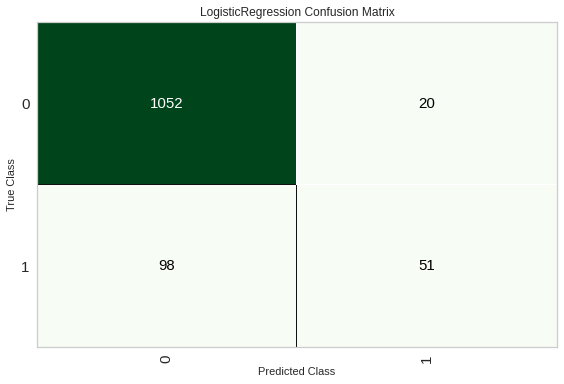

In [19]:
plot_model(tuned_lr, plot = 'confusion_matrix')

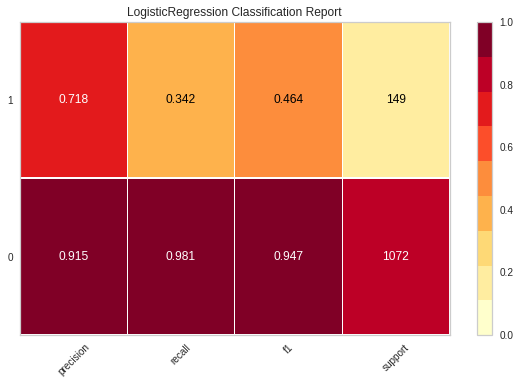

In [20]:
plot_model(tuned_lr, plot = 'class_report')

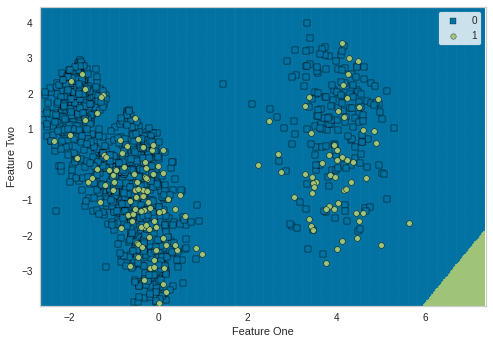

In [21]:
plot_model(tuned_lr, plot='boundary')

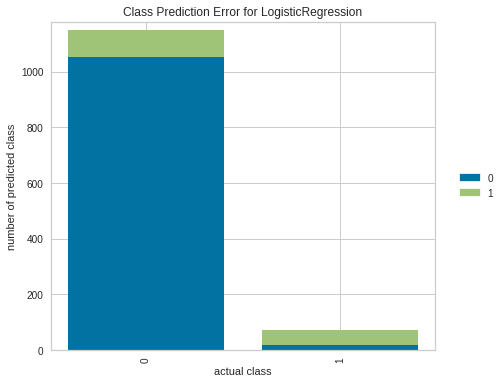

In [22]:
plot_model(tuned_lr, plot = 'error')

In [23]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9034,0.8971,0.3423,0.7183,0.4636,0.4178,0.4526


In [25]:
final_lr = finalize_model(tuned_lr)

In [26]:
print(final_lr)

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,no,0.8276
1,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no,0.9705
2,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no,no,0.9325
3,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes,no,0.7085
4,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no,no,0.9849


In [28]:
save_model(final_lr,'Final LR Model 11Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.689, class_weight={}, dual=False,
                 

In [29]:
saved_final_lr = load_model('Final LR Model 11Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

In [31]:
new_prediction.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,no,0.8276
1,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no,0.9705
2,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no,no,0.9325
3,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes,no,0.7085
4,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no,no,0.9849
